# Regresion polinomial
$a_0+a_1x+\dots +a_nx^n$

$y=Mx+b$

$y=b_0+B_1+B_2+\dots +B_kx^k+t$

Bic
Bayesian Information Criterion

$BIC= nlog(SSC_g)+klog(n)$ con n datapoints


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


[[1.00000000e+00 1.20000000e+03 1.44000000e+06 ... 3.58318080e+21
  4.29981696e+24 5.15978035e+27]
 [1.00000000e+00 1.99000000e+02 3.96010000e+04 ... 1.23586643e+16
  2.45937419e+18 4.89415464e+20]
 [1.00000000e+00 1.12400000e+03 1.26337600e+06 ... 2.26654413e+21
  2.54759560e+24 2.86349745e+27]
 ...
 [1.00000000e+00 1.13000000e+03 1.27690000e+06 ... 2.35260548e+21
  2.65844419e+24 3.00404194e+27]
 [1.00000000e+00 8.60000000e+02 7.39600000e+05 ... 3.47927822e+20
  2.99217927e+23 2.57327417e+26]
 [1.00000000e+00 1.12600000e+03 1.26787600e+06 ... 2.29492625e+21
  2.58408696e+24 2.90968191e+27]]
Acuracy:  0.9419389557739559


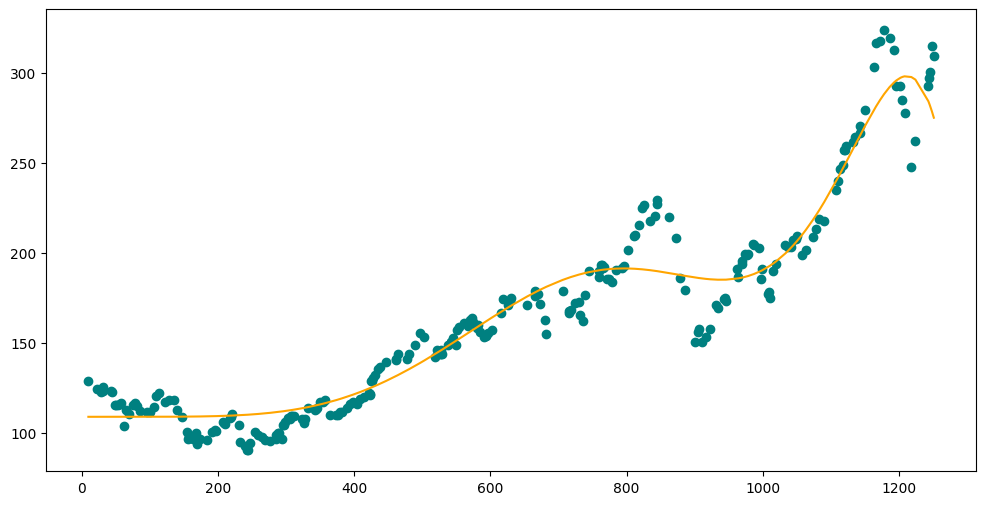

In [3]:
data = pd.read_csv('AAPL.csv')
X= data.iloc[:, 0].values
y= data.iloc[:, 3].values
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
#cambiar los datos a polinomios
poly = PolynomialFeatures(degree=9)
X_Train = poly.fit_transform(X_Train.reshape(-1, 1))
X_Test = poly.transform(X_Test.reshape(-1, 1))

print(X_Train)

#entrenando el modelo
model = LinearRegression()
#por default, fit hace 200 epocas
model.fit(X_Train, y_Train)
#predicciones
y_Pred = model.predict(X_Test)
#metricas
acuracy =  r2_score(y_Test, y_Pred)
print ('Acuracy: ', acuracy)
# Ensure sort_idx contains valid indices for X_Test
sort_idx = np.argsort(X_Test[:, 1])  # Sort based on the second column of X_Test
X_Test_sorted = X_Test[sort_idx]
y_Test_sorted = y_Test[sort_idx]
y_Pred_sorted = y_Pred[sort_idx]
#grafica de los datos 
plt.figure(figsize=(12, 6))
plt.scatter(X_Test_sorted[:, 1], y_Test_sorted, color='teal', label='Datos de prueba')
plt.plot(X_Test_sorted[:, 1], y_Pred_sorted, color='orange', label='Predicción')


## Supervisado

Predicciones:  [1 0 2 1 1 0 1 2 1 2 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 2 1 2 0 0]
Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.78      0.70         9
           2       0.78      0.64      0.70        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



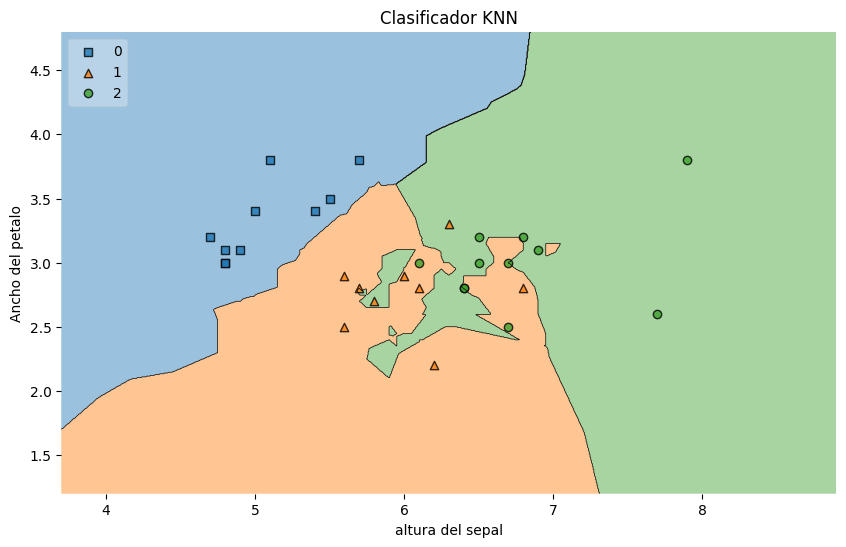

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
iris=load_iris()


X=iris.data[:,:2]
y=iris.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
#entrenando el modelo
knn.fit(X_Train, y_Train)
#predicciones
y_Pred = knn.predict(X_Test)
print('Predicciones: ', y_Pred)
#reporte de clasificacion
print('Reporte de clasificacion: ')
print(classification_report(y_Test, y_Pred))

plt.figure(figsize=(10, 6))
plot_decision_regions(X_Test, y_Test, clf=knn, legend=2)
plt.xlabel('altura del sepal')
plt.ylabel('Ancho del petalo')
plt.title('Clasificador KNN')
plt.show()

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.78      0.70         9
           2       0.78      0.64      0.70        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

Predicciones: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      0.67      0.71         9
           2       0.77      0.91      0.83        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



Text(0.5, 1.0, 'Decision Tree')

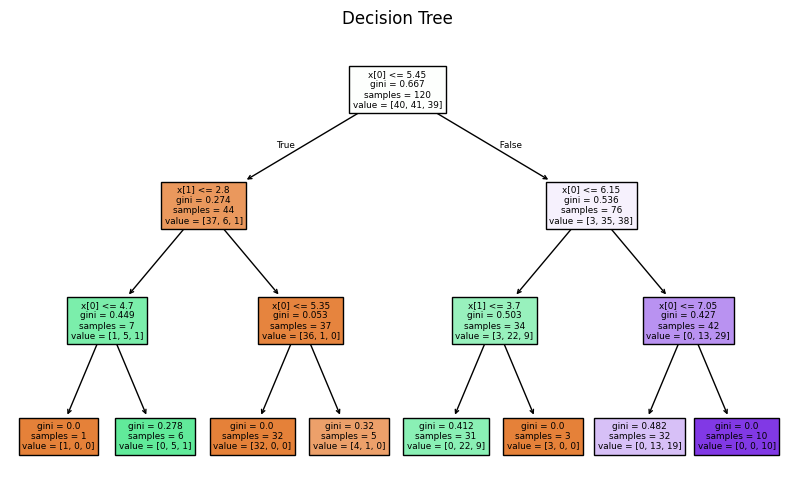

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt=DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
dt.fit(X_Train, y_Train)
print("Reporte de clasificacion: ")
print(classification_report(y_Test, y_Pred))
y_Pred_tree = dt.predict(X_Test)
print('Predicciones: ')
print(classification_report(y_Test, y_Pred_tree))
plt.figure(figsize=(10, 6))
plot_tree(dt, filled=True)
plt.title('Decision Tree')

Checar la importance feature